# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** <BR>
- **Does the Smartcab move at all during the simulation?** <BR>
It does not move per training trial however at the start of a new trial it is randomly located at a new position from which it does not move during that trial.

- **What kind of rewards is the driving agent receiving?** <BR>
Seems to be a smaller floating point value. Negative values for traffic violation were the severity determined the amount and smaller positive rewards for complying with traffice regulations. 

- **How does the light changing color affect the rewards?** <BR>
It is getting positive rewards for being idle at a red light (no action). It is getting negative rewards for not moving at a green light with no oncoming traffice (no action)


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** <BR>
**In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.** <BR>
1st flag: alpha - The learning rate or step size determines to what extent the newly acquired information will override the old information. A factor of 0 will make the agent not learn anything, while a factor of 1 would make the agent consider only the most recent information. <BR>
Note: In fully deterministic environments, a learning rate of 1 is optimal. When the problem is stochastic, the algorithm still converges under some technical conditions on the learning rate that require it to decrease to zero.

2nd flag: epsilon - As the agent begins the learning, we would want it to take random actions to explore more paths. But as the agent gets better, the Q-function converges to more consistent Q-values. Now we would like our agent to exploit paths with highest Q-value i.e take greedy actions. This is where epsilon comes in: <BR>
- The agent takes random actions for probability ε and greedy action for probability (1-ε) <BR>

Google DeepMind used a decaying ε-greedy action selection. Where ε decays over time from 1 to 0.1 — in the beginning, the system makes completely random moves to explore the state space maximally, and then it settles down to a fixed exploration rate.

3rd flag: learning - when set the driving agent will be using Q-learning for its continued learning, versus when not set, in which case it will perform random actions. <BR>

**In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?**<BR>
The class function called is **act(agent, action)**

**In the *`simulator.py`* Python file, what's the difference between the functions *`'render_text()'`* and *`'render()'`*?** <BR>
Class method render_text(): non-GUI render display of the simulation. Writes to the terminal/command prompt <BR>
Class method render(): GUI render display of the simulation, that is, handles the messages displayed in the GUI


**In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?** <BR>
East-West direction is considered before North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


Actions:     trial      good     minor     major  minor_acc  major_acc
9      10  0.601807  0.127494  0.191288   0.016165   0.063246
10     11  0.618474  0.127494  0.171844   0.027276   0.054912
11     12  0.624426  0.135589  0.167796   0.025609   0.046579
12     13  0.622950  0.124789  0.169505   0.025066   0.057690
13     14  0.626365  0.122773  0.176562   0.027505   0.046796
14     15  0.635407  0.113065  0.184674   0.026441   0.040413
15     16  0.638565  0.108285  0.190771   0.027888   0.034492
16     17  0.640569  0.102655  0.189531   0.029104   0.038140
17     18  0.639769  0.111086  0.183131   0.029166   0.036848
18     19  0.642435  0.115859  0.181880   0.027388   0.032437
19     20  0.641242  0.120702  0.174982   0.026940   0.036134


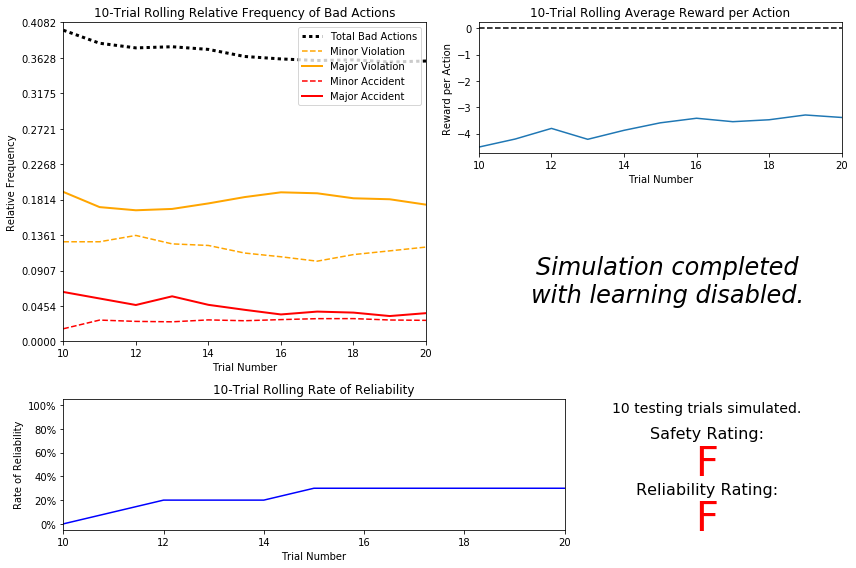

In [13]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** <BR>

**How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?** <BR>
Looking at the top left figure we see that bad decisions are made around 40% of the time (black dotted line). Accidents happen approximately 6% to 8% of the time (sum of red curves)

**Given that the agent is driving randomly, does the rate of reliability make sense?** <BR>
Yes it does. Here is why: <BR>
- Actions per trial ~ 20 <BR>
- Actions leading to a change in state 75% (['forward', 'left', 'right']) <BR>
- On average per trial we visit roughly 15 states (assuming we don't revisit old states again per trial) <BR>
- Car will occupy 1 state which leaves 47 states (6x8 grid) for the target so that means max. average reliability ~ 15/47 almost 32% <BR>

Now the real value will be less as we sometimes will revisit states. What is the percentage 20%? Not sure but it gives an idea about what we can expect in best case senarios. Looking at the graph with its rolling average of 10 trials it has an average around 25% which is aligned with our max. average reliability of around 32%

**What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**<BR>
Small positive rewards for following the traffice rules:
- Agent properly idled at a red light. (rewarded 2.43)

this seems to happen on average in half of the cases. The other half of the cases are mostly negative rewards for not following the traffice rules, such as:
- Agent attempted driving forward through a red light. (rewarded -10.70)
- Agent idled at a green light with no oncoming traffic. (rewarded -5.03)

Now this in itself more than tips the balance towards an average negative value. If we add Minor and Major accidents (around 10% to 20% of the time):
- Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.62)

then we get the figure in the top right panel showing an average 10 trial rolling reward of -4 to -5. So rather heavily penalized.

**As the number of trials increases, does the outcome of results change significantly?**<BR>
No, the averages becomes more well defined with less variation however the trend we already observe will not change significantly

**Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**<BR>
No, it is neither to be considered safe or reliable and this is also illustrated by lowest possible rating of F for both safety and reliability. A safety rating of F means: at least one major accident. A reliability rating of F means: Failed to reach the destination on time for at least 60% of trips.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** <BR>
**Which features available to the agent are most relevant for learning both safety and efficiency?** <BR>
If we look at each feature by itself I would argue like this: <BR>
**Efficiency** is represented by waypoint. In order for us to get to the target we need direction meaning waypoint. <BR>
**Safety** is represented by inputs. Of these traffic light are most critical for our safety. Second most important, in order to comply with safe driving and the law, we need to know what comes from the left when doing a right having a red light. The remaining features are important but less so as they only really matter in case we make a traffice violation in the first place by illegaly running a red light.  <BR>
**Learning** is represented by deadline, however we don't strictly need a deadline we could just ask the Smartcab to get to the target ASAP, and then weight succesful drives using least actions the most. So from that perspective waypoint and inputs are most relevant.

**Why are these features appropriate for modeling the Smartcab in the environment?** <BR>
Waypoint is our navigation system taking us to the target in the most direct manner (least actions)<BR>
Inputs are our senses making it possible to comply with traffic regulations while we are driving towards our target. Above I argue why some are more appropriate than others (most important: light, left; less important: oncoming, right). <BR>

**If you did not choose some features, why are those features not appropriate?** <BR>
I do think that Deadline is appropriate however not the most relevant for the question asked. Deadline is stil the constraint that allows us to learn, in the shortest amount of time, from our successes and failures, again and again... however we can do that in other ways as mentioned above. Another think to consider with deadline, in relation to safety, is that a deadline may conflict with safety if efficiency becomes more important that safety. <BR>
Features: oncoming and right are important but less so than the other features as they only really matter in case we make a traffice violation in the first place by illegaly running a red light.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** <BR>
**If a state is defined using the features you've selected from Question 4, what would be the size of the state space?** <BR> 

So I choose to operate with 'waypoint', 'inputs.light' and 'inputs.left'. These features can return the following values:
- 'waypoint': ['forward', 'left', 'right']
- 'inputs': {'light': [True, False], 'left': [None, 'forward', 'left', 'right']}

No of states = (waypoint outcomes)*(inputs outcomes) = (3)x(2x4) = 24
               
**Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?** <BR>
Yes, 24 states should be doable within a short time period. The whole state space is 6x8x24 = 1152 I would expect that to be a matter of minutes (the most). If we had included 'inputs.incoming' and 'inputs.right' which was my initial idea then we would have had 'no of states' = 384 and a whole state space of size 18,432. Now considering we are using a stocastic process to map all paths this would be a much more difficult if at all pratical exercise. 


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

Actions:     trial      good     minor     major     minor_acc  major_acc
9      10  0.687000  0.088000  0.169000  2.000000e-02      0.036
10     11  0.712000  0.083000  0.154000  1.500000e-02      0.036
11     12  0.764000  0.059000  0.134000  1.500000e-02      0.028
12     13  0.772000  0.047000  0.146000  1.500000e-02      0.020
13     14  0.817000  0.037000  0.116000  1.000000e-02      0.020
14     15  0.817000  0.037000  0.126000  1.000000e-02      0.010
15     16  0.832909  0.037000  0.110091  1.000000e-02      0.010
16     17  0.841144  0.037882  0.105973  5.000000e-03      0.010
17     18  0.856144  0.037882  0.090973  5.000000e-03      0.010
18     19  0.881144  0.027882  0.080973  1.387779e-18      0.010
19     20  0.909144  0.015882  0.064973  1.387779e-18      0.010


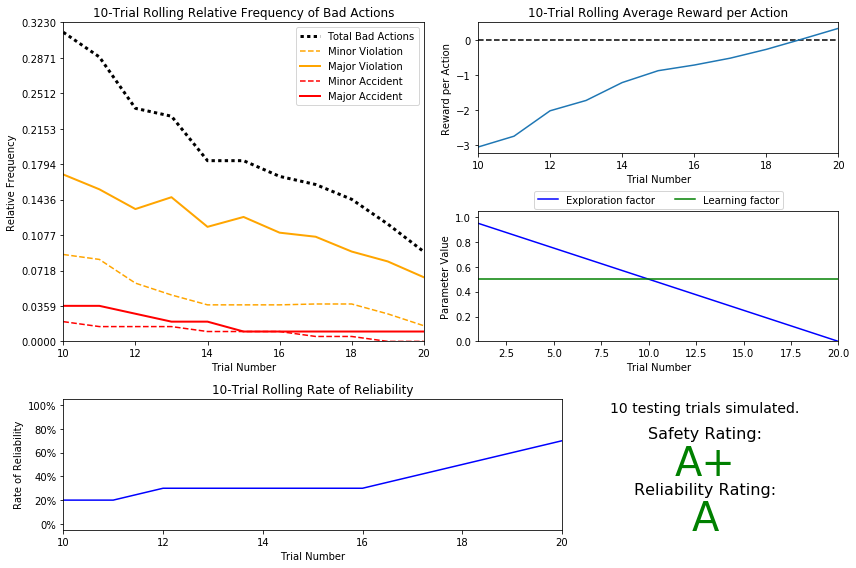

In [69]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** <BR>

**How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?** <BR>
Looking at the top left figure we see that Q-learning are working as we experience a sharp fall in  bad decisions from trial 10 to trial 20. In the no-learning case the rate of bad decisions was a constant lying around 40%. Now we end up below 10% and it is decreasing with more trials. Accidents are down from  approximately 6% to 8% to around 1% with our new learning algorithm

**Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?** <BR>
Not really, we have a random walk versus a prober learning process. The random walk will just average out its properties like reliability etc versus the Q-learning agent who continously improve

**What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**<BR>
Top right panel clearly demonstrates how the agent is averaging around an average of -3 points after 10 trials only to reach an average positive reward score around +.5 after 20 trials. So not penalized but genuinly rewarded as it learns. The types of positive rewards are:
- Agent properly idled at a red light. (rewarded 1.49)
- Agent followed the waypoint right. (rewarded 2.10) <BR>

This is to be contrasted with the no-learning implementation that had a nearly constant negativ reward around -4

**As the number of trials increases, does the outcome of results change significantly?**<BR>
Yes, it all changes to the better. Both rewards and reliability continously increases at it learns. This in contrast to the no-learning agent were it is all fluctuating around an average constant  

**Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?** <BR>
In its current form around 20 trials of which the first half was broken into focussing on exploration and the last half on exploitation.  And this is to be expected as our epsilon decays as: epsilon(t+1) = epsilon(t) - 0.05 while the epsilon-tolerance is 0.05 and testing kicks in when the following condition is true: agent.epsilon is less than epsilon-tolerance, meaning that testing start after 20 trials

**Is the decaying function you implemented for  ϵϵ  (the exploration factor) accurately represented in the parameters panel?** <BR>
Yes, see middel panel right hand side. Showing a constant learning factor of 0.5 and a decreasing exploration factor meeting at exactly 10 trials. Which means that after 10 trials we are increasingly relying on on our Q-table to guide us in selecting next action rather than exploring new paths randomly. This also explains the sharp learnings we see for reliability and rewards from trial 10 to 20

**Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**<BR>
Yes, we have a safety rating of A+:
- Agent commits no traffic violations, and always chooses the correct action.
We have a relaibility rating of A:
- Agent reaches the destination on time for at least 90% of trips.
Still room for improvements but it is both afe and reliable

**How does the safety and reliability rating compare to the initial driving agent?** <BR>
It is two different worlds: <BR>
No-learning - F, F <BR>
Q-learning - A+, A

A safety rating of F means: Agent causes at least one major accident <BR>
A safety rating of A+ means: Agent commits no traffic violations, and always chooses the correct action

A reliability rating of F means: Agent fails to reach the destination on time for at least 60% of trips <BR>
A reliability rating of A means: Agent reaches the destination on time for at least 90% of trips


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

Actions:      trial      good     minor         major     minor_acc     major_acc
9       10  0.590636  0.124255  2.087792e-01  2.878355e-02  4.754545e-02
10      11  0.621498  0.116152  1.891240e-01  2.723183e-02  4.599373e-02
11      12  0.637498  0.105866  1.839812e-01  1.866040e-02  5.399373e-02
12      13  0.674387  0.108977  1.559812e-01  1.466040e-02  4.599373e-02
13      14  0.659387  0.103977  1.709812e-01  1.466040e-02  5.099373e-02
14      15  0.667387  0.101977  1.699812e-01  1.466040e-02  4.599373e-02
15      16  0.677387  0.076977  1.749812e-01  1.966040e-02  5.099373e-02
16      17  0.664054  0.083644  1.849812e-01  1.299373e-02  5.432706e-02
17      18  0.675418  0.075008  1.863448e-01  8.448276e-03  5.478161e-02
18      19  0.695418  0.075008  1.663448e-01  8.448276e-03  5.478161e-02
19      20  0.722084  0.058341  1.496782e-01  8.448276e-03  6.144828e-02
20      21  0.721222  0.061444  1.493333e-01  5.000000e-03  6.300000e-02
21      22  0.707127  0.066968  1.611429e-

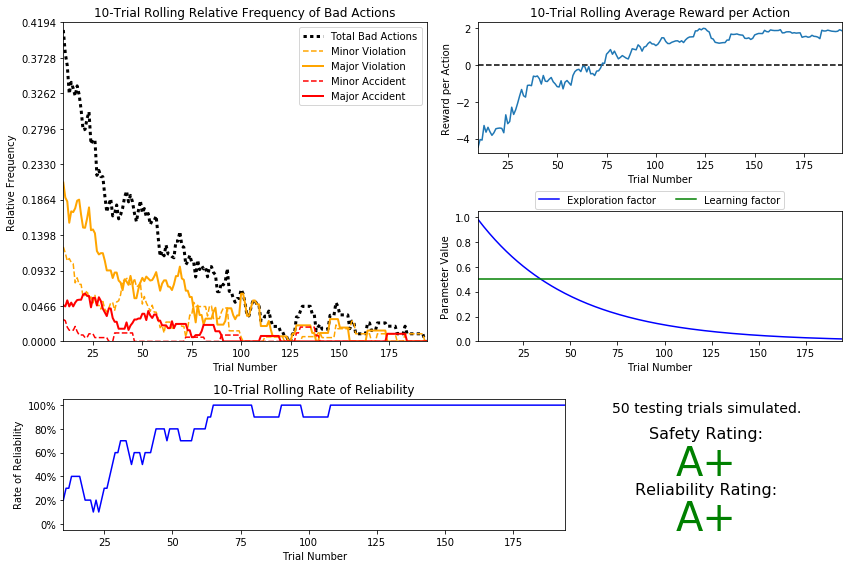

In [75]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** <BR>

**What decaying function was used for epsilon (the exploration factor)?** <BR>
epsilon(t + 1) = epsilon(t) * 0.98

**Approximately how many training trials were needed for your agent before begining testing?** <BR>
194

**What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?** <BR>
epsilon-tolerance = 0.02 <BR>
alpha = 0.5

My value for the epsilon-tolerance was a result of wanting to have many trials allowing thorough exploration and finetuning of the Q-table. Looking at the rolling averages for both reliability and rewards does reveal that we could have stopped earlier because both are already maximised after approximately 150 trials (epsilon-tolerance ~ 0.03).
I have kept alpha at 0.5 as I value both new and old information equally. Reminding ourselves that a factor of 0 will make the agent learn nothing, while a factor of 1 would make the agent consider only the most recent information (the reward)

**How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?** <BR>
We already had a strong learner implementation (A+, A) with the default setup and that was primarily due to a manageable state space based on the features picked. This one does do better (A+, A+) but this is primarily due to a much slower decaying epsilon function allowing more time to learn and fine tune the Q-table.

**Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?** <BR>
Absolutely! We are consistently demonstrating an almost 100% reliability and reward maximisation

**Are you satisfied with the safety and reliability ratings of the *Smartcab*?** <BR>
Yes!

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** <BR>

**Q1: Summarize what the optimal policy looks like** <BR>

**When waypoint is right** <BR>
If light is red and if there is car coming from the left <BR>
> wait <BR>

else <BR>
> go right <BR>


**When waypoint is forward** <BR>
If light is green <BR>
> go forward <BR>

else <BR>
> wait <BR>


**When waypoint is left** <BR>
If light is green <BR>
> go left <BR>

else <BR>
> wait <BR>


**Q2: Compared with txt based log file** <BR>
All 24 states has implemented the correct policy, there are no cases of a sub-optimal policy


**Q3: Examples that demonstrate that the smartcab learned the optimal policy** <BR>
state = (waypoint, inputs['light'], inputs['left']) <BR>
state = ('forward', 'green', 'left') --> optimal policy means FORWARD and that is correct <BR>
 -- **forward : 1.78**
 -- right : 1.22
 -- None : -4.59
 -- left : 0.82

state = ('left', 'green', 'right') --> optimal policy means LEFT and that is correct <BR>
 -- forward : 0.00
 -- right : 0.78
 -- None : 0.00
 -- **left : 2.02**

state = ('right', 'red', 'forward') --> optimal policy means wait (NONE) and that is correct <BR>
 -- forward : -34.92
 -- right : -19.49
 -- **None : 1.21**
 -- left : 0.00

state = ('right', 'green', None) --> optimal policy means RIGHT and that is correct <BR>
 -- forward : 0.27
 -- **right : 2.44**
 -- None : -5.05
 -- left : 1.15

Note on larger negative q-values:
state = ('forward', 'red', 'forward')
 -- forward : -30.14
 -- right : -18.77
 -- None : 1.84
 -- left : -38.24
When the waypoint is ‘forward’ and the light is ‘red’, the driving agent waits without doing anything which is the optimal action. Going forward or turning left will violate the law and cause accident, so the penalty is large(-30.14 and -38.24). If the agent chooses to turn right at this state, since the oncomming traffic is going forwards we we will suffer an accident but it could be considered a 'less speed incident' compared to a forward - forward collision so therefore a smaller negative reward than the in the other two cases.


**Q4: Discuss entries where the smartcab did not learn the optimal policy** <BR>
Don't have any but here is a case where one could easily imagine a sub-optimal policy:

('right', 'red', None)
 -- forward : -10.35
 -- **right : 1.30**
 -- *None : 1.16*
 -- left : -11.10
 
In this case the optimal policy is correctly implemented but we do see that just waiting is pretty close to matching going right. By waiting we could argue that we are extra careful and not causing any accidents, it is just taking a little longer geting there. In this case a 'wrong' decreasing epsilon function or lackof no. of trials could result in a sub-optimal policy.



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** <BR>

Regarding the Agent: <BR>
Since each state is local, only knows about it's current intersection and has no global state, there is no benefit in linking actions together. It is all about complying with the trafic regulations in a safe manner. Therefore, it can not plan ahead of time. Since we can not plan ahead more than one move, long-term rewards are not appropriate.

Regarding the Environment: <BR>
Since the environment changes with every trial, there is no inherint benefit to being on one particular position of the grid (no fixed reward every time). Which suggests that there should be no long term reward associated with any position in the environment. <BR>
In fact, if a future reward would be a location/destination based policy and not a traffic rule based policy, that would make the Smartcab agent start learning bad actions since the negative rewards generated by the traffic violations may be smaller than the accumulated future rewards of meeting the goal. To do so would make the agent unlearn its safety policies.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.